# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### Цель работы:

построить модель для задачи классификации, которая выберет новый тариф «Смарт» или «Ультра», наиболее подходящий пользователям архивных тарифов, основываясь на поведении клиентов, которые уже перешли на эти тарифы.  

Описание данных:  
- сalls — количество звонков,  
- minutes — суммарная длительность звонков в минутах,  
- messages — количество sms-сообщений,  
- mb_used — израсходованный интернет-трафик в Мб,  
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).  

Необходимо решить следующие задачи:  

- Изучить исходные данные. 
- Разделить исходные данные на обучающую, валидационную и тестовую выборки.  
- Исследовать качество разных моделей, меняя гиперпараметры. Построить модель с максимально большим значением *accuracy* (не менее 0.75). Написать выводы исследования.  
- Проверить качество модели на тестовой выборке.  
- Дополнительное задание: проверить модели на вменяемость. 

## Откройте и изучите файл

In [49]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [4]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.duplicated().sum()

0

## Разбейте данные на выборки

features - признаки.  
target - целевой признак.

In [7]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

df_valid, target_valid - признаки и целевой признак валидационной выборки.  
df_train, target_train - признаки и целевой признак обучающей выборки.  
df_test, target_test - признаки и целевой признак тестовой выборки.

In [8]:
df_a, df_valid, target_a, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)
df_train, df_test, target_train, target_test = train_test_split(df_a, target_a, test_size=0.2, random_state=12345)

In [9]:
df_valid.shape

(643, 4)

In [10]:
df_train.shape

(2056, 4)

In [11]:
df_test.shape

(515, 4)

## Исследуйте модели

Модель Дерево решений.  
default: criterion=”gini”, splitter='best', 
max_depth=None

In [72]:
model_1 = DecisionTreeClassifier(random_state=12345)
model_1.fit(df_train, target_train)
answers_1 = model_1.predict(df_valid)
accuracy_1 = accuracy_score(target_valid, answers_1)
accuracy_1

0.7309486780715396

In [73]:
model_1 = DecisionTreeClassifier(random_state=12345, criterion='entropy')
model_1.fit(df_train, target_train)
answers_1 = model_1.predict(df_valid)
accuracy_1 = accuracy_score(target_valid, answers_1)
accuracy_1

0.7325038880248833

In [13]:
model_1 = DecisionTreeClassifier(random_state=12345, splitter='random')
model_1.fit(df_train, target_train)
answers_1 = model_1.predict(df_valid)
accuracy_1 = accuracy_score(target_valid, answers_1)
accuracy_1

0.7200622083981337

In [40]:
best_result = 0
mdepm = 0
for mdep in range(2, 11):
    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=mdep)
    model_1.fit(df_train, target_train)
    answers_1 = model_1.predict(df_valid)
    accuracy_1 = accuracy_score(target_valid, answers_1)
    if accuracy_1 > best_result:
        best_model = model_1
        mdepm = mdep
        best_result = accuracy_1 #сохраним наилучшее значение метрики accuracy
print(f"Accuracy наилучшей модели {best_result:.2} при max_depth = {mdepm}")

Accuracy наилучшей модели 0.79 при max_depth = 7


Модель Случайный лес.  
default: n_estimators = 100, min_samples_split=2, min_samples_leaf=1

In [27]:
model_2 = RandomForestClassifier(random_state=12345)
model_2.fit(df_train, target_train)
answers_2 = model_2.predict(df_valid)
accuracy_2 = accuracy_score(target_valid, answers_2)
accuracy_2

0.7884914463452566

Посчитаем accuracy при изменении гипепараметра n_estimators от 10 до 110 с шагом 10.

In [41]:
best_result = 0
mest = 0
for est in range(10, 110, 10):
    model_2_2 = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_2_2.fit(df_train, target_train)
    answers_2_2 = model_2_2.predict(df_valid)
    accuracy_2_2 = accuracy_score(target_valid, answers_2_2)
    if accuracy_2_2 > best_result:
        best_model = model_2_2
        mest = est
        best_result = accuracy_2_2 #сохраним наилучшее значение метрики accuracy
print(f"Accuracy наилучшей модели {best_result:.2} при n_estimators = {mest}")

Accuracy наилучшей модели 0.79 при n_estimators = 60


In [42]:
best_result = 0
mmss = 0
for mss in range(2, 11):
    model_2 = RandomForestClassifier(random_state=12345, min_samples_split=mss)
    model_2.fit(df_train, target_train)
    answers_2 = model_2.predict(df_valid)
    accuracy_2 = accuracy_score(target_valid, answers_2)
    if accuracy_2 > best_result:
        best_model = model_2
        mmss = mss
        best_result = accuracy_2 #сохраним наилучшее значение метрики accuracy
print(f"Accuracy наилучшей модели {best_result:.2} при min_samples_split = {mmss}")

Accuracy наилучшей модели 0.79 при min_samples_split = 7


In [43]:
best_result = 0
mmsl = 0
for msl in range(1, 11):
    model_2 = RandomForestClassifier(random_state=12345, min_samples_leaf=msl)
    model_2.fit(df_train, target_train)
    answers_2 = model_2.predict(df_valid)
    accuracy_2 = accuracy_score(target_valid, answers_2)
    if accuracy_2 > best_result:
        best_model = model_2
        mmsl = msl
        best_result = accuracy_2 #сохраним наилучшее значение метрики accuracy
print(f"Accuracy наилучшей модели {best_result:.2} при min_samples_leaf = {mmsl}")

Accuracy наилучшей модели 0.79 при min_samples_leaf = 4


Модель Логистическая регрессия.

In [148]:
model_3 = LogisticRegression(random_state=12345)
model_3.fit(df_train, target_train)
answers_3 = model_3.predict(df_valid)
accuracy_3 = accuracy_score(target_valid, answers_3)
accuracy_3

0.76049766718507

Посчитаем accuracy при изменении гипепараметра max_iter от 200 до 2000 с шагом 200.

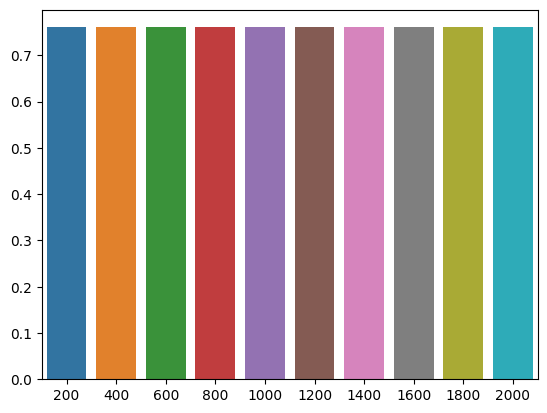

In [71]:
accuracy = []
mit = []
for miter in range(200, 2200, 200):
    model_3_2 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=miter)
    model_3_2.fit(df_train, target_train)
    answers_3_2 = model_3_2.predict(df_valid)
    accuracy_3_2 = accuracy_score(target_valid, answers_3_2)
    accuracy.append(accuracy_3_2)
    mit.append(miter)
sb.barplot(x=mit, y=accuracy);

Посчитаем accuracy при значении гипепараметра solver='liblinear'.

In [150]:
model_3 = LogisticRegression(random_state=12345, solver='liblinear', max_iter=100)
model_3.fit(df_train, target_train)
answers_3 = model_3.predict(df_valid)
accuracy_3 = accuracy_score(target_valid, answers_3)
accuracy_3

0.749611197511664

Вывод:В модели Дерево решений accuracy незначительно выше при criterion='entropy', чем при criterion='gini', при splitter='best', выше чем при splitter='random'. Accuracy наилучшей модели 0.79 при max_depth = 7    
В модели Случайный лес изменение гипепараметров n_estimators, min_samples_split, min_samples_leaf влечет за собой изменение качества модели. Наибольшее значение accuracy при n_estimators равной 60. Accuracy наилучшей модели равно 0.79 при min_samples_split = 7. Accuracy наилучшей модели - 0.79 при min_samples_leaf = 4.  
При изменении гипепараметра max_iter от 200 до 2000 с шагом 200 в модели Логистическая регрессия, accuracy не изменяется. При solver='liblinear' качества модели ниже, чем при solver='lbfgs'.

## Проверьте модель на тестовой выборке

In [151]:
answers_2_test = model_2.predict(df_test)
accuracy_2_test = accuracy_score(target_test, answers_2_test)
accuracy_2_test

0.7864077669902912

In [152]:
model_test = RandomForestClassifier(random_state=12345, n_estimators=60)
model_test.fit(df_train, target_train)
answers_test = model_test.predict(df_test)
accuracy_test = accuracy_score(target_test, answers_test)
accuracy_test

0.7786407766990291

## (бонус) Проверьте модели на адекватность

Чтобы оценить адекватность модели, или проверить её на вменяемость нужно сравнивнить модель со случайной. В модели, которая предсказывает все объекты случайным образом, с вероятностью 50/50 ответ будет 0 или 1 («Ультра» — 1, «Смарт» — 0).

In [153]:
target.sum()

985

985 человек выбрали тариф «Ультра», что составляет 30.6% или 0.306 * количество объектов, соответственно тариф «Смарт» выбрали 0.693 * количество объектов. accuracy = количество правильных ответов/количество объектов.  
accuracy = (0.306 * количество объектов * 0.5 + 0.693 * количество объектов * 0.5)/количество объектов = 0.5  
Качество адекватной модели должно быть больше 0.5.

### Общий вывод

В ходе работы: 
- Разделили исходные данные на обучающую, валидационную и тестовую выборки.  
- Исследовали качество моделей: Дерево решений, Случайный лес и Логистическая регрессия. Исследовали влияние изменения гиперпараметров на качество модели. Построить модель с максимально большим значением *accuracy* (Модель Случайный лес при n_estimators = 60 и 80 accuracy = 0.79).  
- Проверили качество модели на тестовой выборке.  
- Проверили модели на вменяемость, все построенные модели адекватны и вменяемы. 